# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
from matplotlib import pyplot
df = pd.read_csv('zillow_data.csv')
df_0 = df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName','SizeRank'],axis=1)
df_0.head()

#download and drop irrelevant columns

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [2]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 266 entries, RegionName to 2018-04
dtypes: float64(219), int64(47)
memory usage: 29.9 MB


In [3]:
df_0.isnull().sum()
#checking to see if any null values

RegionName       0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

In [4]:
#fill in null values.. can come back to this later if we want to fill with median values
df_1=df_0.fillna(method='ffill')
df_1.columns

Index(['RegionName', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=266)

In [5]:
df_1

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,77084,95000.0,95200.0,95400.0,95700.0,95900.0,96100.0,96200.0,96100.0,96000.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,10467,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,77449,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,94109,766000.0,771100.0,776500.0,781900.0,787300.0,793000.0,799100.0,805800.0,814400.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


# Step 2: Data Preprocessing

In [6]:
#df_1 is our index in datetime object, we will use this to replace our non-datetime object index
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')
get_datetimes(df_1)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [7]:
df_index_1 = get_datetimes(df_1)

In [8]:
df_transpose = df_1.transpose()
(df_transpose.drop('RegionName', inplace = True))
df_transpose.index = df_index_1


In [9]:
df_3 = df_1.loc[:, 'RegionName']
df_4= pd.DataFrame(df_3)



In [10]:
df_4.shape

(14723, 1)

In [11]:
#merging region name series with df_transpose as a column name 
df_transpose.columns = df_4.RegionName


In [12]:
df_transpose

RegionName,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,...,80800.0,135900.0,78300.0,136200.0,62500.0,94600.0,92700.0,57100.0,191100.0,176400.0
1996-05-01,335400.0,236900.0,212200.0,500900.0,77300.0,95200.0,152700.0,216700.0,95600.0,771100.0,...,80100.0,136300.0,78300.0,136600.0,62600.0,94300.0,92500.0,57300.0,192400.0,176300.0
1996-06-01,336500.0,236700.0,212200.0,503100.0,77300.0,95400.0,152600.0,216900.0,95800.0,776500.0,...,79400.0,136600.0,78200.0,136800.0,62700.0,94000.0,92400.0,57500.0,193700.0,176100.0
1996-07-01,337600.0,235400.0,210700.0,504600.0,77300.0,95700.0,152400.0,217000.0,96100.0,781900.0,...,78600.0,136900.0,78200.0,136800.0,62700.0,93700.0,92200.0,57700.0,195000.0,176000.0
1996-08-01,338500.0,233300.0,208300.0,505500.0,77400.0,95900.0,152300.0,217100.0,96400.0,787300.0,...,77900.0,137100.0,78100.0,136700.0,62700.0,93400.0,92100.0,58000.0,196300.0,175900.0
1996-09-01,339500.0,230600.0,205500.0,505700.0,77500.0,96100.0,152000.0,217200.0,96700.0,793000.0,...,77200.0,137400.0,78000.0,136600.0,62600.0,93200.0,91900.0,58200.0,197700.0,175800.0
1996-10-01,340400.0,227300.0,202500.0,505300.0,77600.0,96200.0,151800.0,217500.0,96800.0,799100.0,...,76400.0,137700.0,78000.0,136400.0,62500.0,93000.0,91700.0,58400.0,199100.0,175800.0
1996-11-01,341300.0,223400.0,199800.0,504200.0,77700.0,96100.0,151600.0,217900.0,96800.0,805800.0,...,75600.0,137900.0,78000.0,136000.0,62400.0,92900.0,91300.0,58700.0,200700.0,176000.0
1996-12-01,342600.0,219600.0,198300.0,503600.0,77700.0,96000.0,151600.0,218600.0,96700.0,814400.0,...,74900.0,138300.0,78100.0,135800.0,62300.0,92700.0,90900.0,59100.0,202600.0,176200.0
1997-01-01,344400.0,215800.0,197300.0,503400.0,77800.0,95800.0,151700.0,219700.0,96600.0,824300.0,...,74300.0,138700.0,78300.0,135800.0,62300.0,92600.0,90500.0,59500.0,204900.0,176500.0


In [13]:
df_resample = df_transpose.resample("A")
df_yearly_mean = df_resample.mean()
df_yearly_mean = pd.DataFrame(data=df_yearly_mean)
df_yearly_mean

RegionName,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
1996-12-31,3.384444e+05,230988.888889,206655.555556,5.034444e+05,77455.555556,95733.333333,152211.111111,217266.666667,96255.555556,7.883444e+05,...,77877.777778,137122.222222,78133.333333,136433.333333,62555.555556,93533.333333,91966.666667,58000.000000,196511.111111,176055.555556
1997-12-31,3.527000e+05,198875.000000,200100.000000,4.990833e+05,77933.333333,95616.666667,152308.333333,227275.000000,97008.333333,8.831250e+05,...,71641.666667,140983.333333,78350.000000,132125.000000,62183.333333,94183.333333,89258.333333,62416.666667,218016.666667,177183.333333
1998-12-31,3.967667e+05,205291.666667,240391.666667,5.616250e+05,79216.666667,97608.333333,156716.666667,260908.333333,101333.333333,1.070767e+06,...,69458.333333,145008.333333,79566.666667,119941.666667,62466.666667,102083.333333,87283.333333,70958.333333,263175.000000,180150.000000
1999-12-31,4.671083e+05,197375.000000,301125.000000,6.519167e+05,81075.000000,104441.666667,166766.666667,313700.000000,112208.333333,1.372342e+06,...,69375.000000,147516.666667,81683.333333,116175.000000,64375.000000,109908.333333,88666.666667,77475.000000,313416.666667,184808.333333
2000-12-31,5.658833e+05,222158.333333,319941.666667,7.513833e+05,82450.000000,105458.333333,183783.333333,379883.333333,124491.666667,1.756550e+06,...,69150.000000,150358.333333,88000.000000,119975.000000,67883.333333,116533.333333,93433.333333,79375.000000,352591.666667,193741.666667
2001-12-31,6.539833e+05,216750.000000,290216.666667,8.538167e+05,79608.333333,107283.333333,204675.000000,440116.666667,116650.000000,2.029275e+06,...,74325.000000,154366.666667,100433.333333,123291.666667,75266.666667,125083.333333,101291.666667,82833.333333,383575.000000,207125.000000
2002-12-31,7.117583e+05,194191.666667,238033.333333,9.321750e+05,79266.666667,112166.666667,230691.666667,489150.000000,115983.333333,2.135667e+06,...,83575.000000,156008.333333,119125.000000,130166.666667,87016.666667,136925.000000,113908.333333,85016.666667,406350.000000,222783.333333
2003-12-31,7.443750e+05,188608.333333,221733.333333,9.941833e+05,81983.333333,116408.333333,250266.666667,525333.333333,120125.000000,2.111233e+06,...,94291.666667,153108.333333,151000.000000,143941.666667,97341.666667,153308.333333,132841.666667,89125.000000,416425.000000,248766.666667
2004-12-31,7.840667e+05,193591.666667,232491.666667,1.039658e+06,88375.000000,122700.000000,286091.666667,559783.333333,127916.666667,2.368533e+06,...,99383.333333,153858.333333,178733.333333,190558.333333,117516.666667,177575.000000,170666.666667,96025.000000,462841.666667,348575.000000
2005-12-31,8.492333e+05,200950.000000,238216.666667,1.114708e+06,97008.333333,126325.000000,340150.000000,635783.333333,129800.000000,2.510875e+06,...,125658.333333,171516.666667,207083.333333,239666.666667,141416.666667,196783.333333,211591.666667,105866.666667,571925.000000,431733.333333


In [14]:
last_year = df_yearly_mean.iloc[-1]

In [15]:
first_year = df_yearly_mean.iloc[0]
first_year

RegionName
60657    3.384444e+05
75070    2.309889e+05
77494    2.066556e+05
60614    5.034444e+05
79936    7.745556e+04
77084    9.573333e+04
10467    1.522111e+05
60640    2.172667e+05
77449    9.625556e+04
94109    7.883444e+05
11226    1.638333e+05
32162    9.980000e+04
11375    2.514222e+05
11235    1.926333e+05
37013    1.140000e+05
90250    1.526444e+05
60647    1.220333e+05
37211    9.888889e+04
78660    1.389889e+05
60618    1.419889e+05
10011    1.419889e+05
10128    3.791967e+06
77573    1.408222e+05
77584    1.409556e+05
28269    1.278778e+05
79912    1.199667e+05
78572    6.888889e+04
94565    1.357111e+05
30349    9.125556e+04
20002    9.371111e+04
             ...     
12156    9.508889e+04
97149    1.907556e+05
77457    9.191111e+04
80481    1.242222e+05
20625    1.108667e+05
20618    9.851111e+04
80510    1.224222e+05
49710    5.414444e+04
1270     1.036889e+05
12480    6.948889e+04
83821    6.948889e+04
29915    3.204333e+05
49768    3.204333e+05
3215     3.204333e+05

In [16]:
difference = last_year - first_year
difference

RegionName
60657    6.914306e+05
75070    8.916111e+04
77494    1.185944e+05
60614    8.027056e+05
79936    4.336944e+04
77084    6.764167e+04
10467    2.618889e+05
60640    5.638833e+05
77449    7.851944e+04
94109    2.993456e+06
11226    7.576917e+05
32162    1.491750e+05
11375    8.362778e+05
11235    6.190667e+05
37013    9.485000e+04
90250    4.567306e+05
60647    3.510667e+05
37211    1.615611e+05
78660    1.025111e+05
60618    3.188111e+05
10011    1.157519e+07
10128    3.571333e+06
77573    1.174278e+05
77584    1.132194e+05
28269    6.959722e+04
79912    6.653333e+04
78572    3.258611e+04
94565    2.857889e+05
30349    3.606944e+04
20002    5.919639e+05
             ...     
12156    1.016861e+05
97149    2.341444e+05
77457    1.406639e+05
80481    2.118778e+05
20625    9.825833e+04
20618    9.026389e+04
80510    1.914278e+05
49710    2.513056e+04
1270     8.138611e+04
12480    9.036111e+04
83821    4.825861e+05
29915    1.619417e+05
49768   -2.331333e+05
3215     4.852667e+05

In [17]:
#took zipcodes with biggest difference from last year compared to first year 
chosen = difference.nlargest(5)
chosen

RegionName
10021    1.822988e+07
10011    1.157519e+07
10014    8.966867e+06
94027    5.561036e+06
90210    4.831700e+06
dtype: float64

In [18]:
df_5 = df_yearly_mean.loc[:,[10021,10011,10014,94027,90210]]
df_5

RegionName,10021,10011,10014,94027,90210
1996-12-31,5.234444e+04,1.419889e+05,2.774333e+05,1.202589e+06,1.023000e+06
1997-12-31,5.416667e+04,1.329667e+05,2.761417e+05,1.306250e+06,1.097925e+06
1998-12-31,6.073333e+04,1.509167e+05,2.539083e+05,1.504233e+06,1.254850e+06
1999-12-31,6.870000e+04,1.758250e+05,2.321917e+05,1.905367e+06,1.365250e+06
2000-12-31,7.125000e+04,2.135917e+05,2.551667e+05,2.588217e+06,1.544767e+06
2001-12-31,7.458333e+04,2.564583e+05,2.644333e+05,3.135842e+06,1.719058e+06
2002-12-31,7.469167e+04,2.743833e+05,2.604917e+05,3.457592e+06,1.951117e+06
2003-12-31,7.730000e+04,2.984167e+05,2.563333e+05,3.543292e+06,2.290150e+06
2004-12-31,1.034656e+07,3.405750e+05,3.787500e+06,3.727325e+06,2.741142e+06
2005-12-31,9.420825e+06,4.046050e+06,3.940400e+06,3.829725e+06,3.141433e+06


In [19]:
#adfuller()

/Users/georginasampson/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


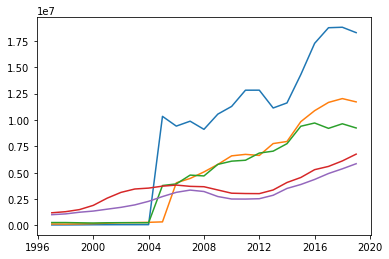

In [26]:
pyplot.plot(df_5)

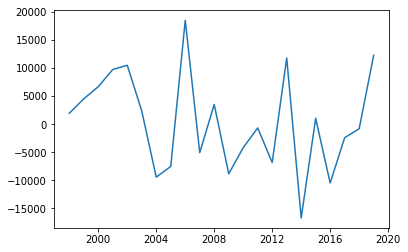

In [63]:
diff= df_zip_1.diff()
pyplot.plot(diff)
pyplot.show()

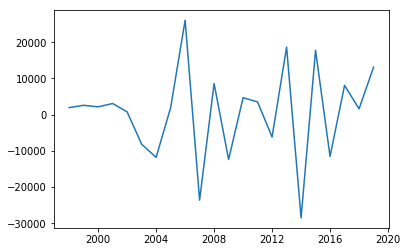

1997-12-31     1944.444444
1998-12-31     2580.555556
1999-12-31     2150.000000
2000-12-31     3075.000000
2001-12-31      750.000000
2002-12-31    -8150.000000
2003-12-31   -11791.666667
2004-12-31     1916.666667
2005-12-31    26050.000000
2006-12-31   -23591.666667
2007-12-31     8583.333333
2008-12-31   -12366.666667
2009-12-31     4666.666667
2010-12-31     3516.666667
2011-12-31    -6175.000000
2012-12-31    18633.333333
2013-12-31   -28500.000000
2014-12-31    17750.000000
2015-12-31   -11525.000000
2016-12-31     8075.000000
2017-12-31     1600.000000
2018-12-31    13083.333333
Freq: A-DEC, Name: 60954, dtype: float64

In [64]:
diff2 = diff.diff().fillna(diff)
pyplot.plot(diff2)
pyplot.show()
diff2.fillna(method='ffill')
diff2.dropna()

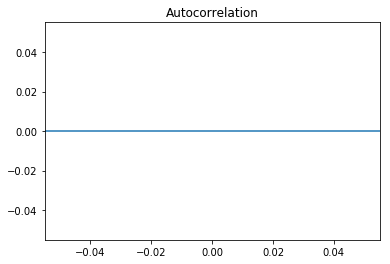

In [65]:
plot_acf(diff2)
pyplot.show()

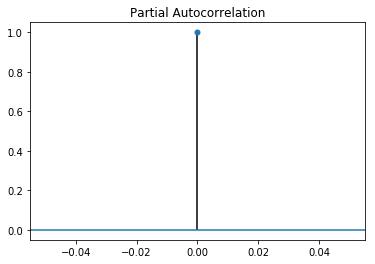

In [66]:
plot_pacf(diff2)
pyplot.show()

In [35]:
df_zip_1= df_yearly_mean.iloc[:,10021] 

df_zip_1

1996-12-31     77988.888889
1997-12-31     79933.333333
1998-12-31     84458.333333
1999-12-31     91133.333333
2000-12-31    100883.333333
2001-12-31    111383.333333
2002-12-31    113733.333333
2003-12-31    104291.666667
2004-12-31     96766.666667
2005-12-31    115291.666667
2006-12-31    110225.000000
2007-12-31    113741.666667
2008-12-31    104891.666667
2009-12-31    100708.333333
2010-12-31    100041.666667
2011-12-31     93200.000000
2012-12-31    104991.666667
2013-12-31     88283.333333
2014-12-31     89325.000000
2015-12-31     78841.666667
2016-12-31     76433.333333
2017-12-31     75625.000000
2018-12-31     87900.000000
Freq: A-DEC, Name: 60954, dtype: float64

In [21]:
df_zip_2 = df_yearly_mean.iloc[:,10011]
df_zip_2

1996-12-31    156677.777778
1997-12-31    168425.000000
1998-12-31    192491.666667
1999-12-31    222058.333333
2000-12-31    246216.666667
2001-12-31    263741.666667
2002-12-31    274191.666667
2003-12-31    281508.333333
2004-12-31    288583.333333
2005-12-31    310833.333333
2006-12-31    132458.333333
2007-12-31    140458.333333
2008-12-31    142733.333333
2009-12-31    154441.666667
2010-12-31    153775.000000
2011-12-31    152341.666667
2012-12-31    154966.666667
2013-12-31    161816.666667
2014-12-31    163833.333333
2015-12-31    184300.000000
2016-12-31    215925.000000
2017-12-31    233500.000000
2018-12-31    235700.000000
Freq: A-DEC, Name: 73165, dtype: float64

In [22]:
df_zip_3 = df_yearly_mean.iloc[:,10014]
df_zip_3

1996-12-31     59611.111111
1997-12-31     65366.666667
1998-12-31     72750.000000
1999-12-31     73450.000000
2000-12-31     75966.666667
2001-12-31     77925.000000
2002-12-31     78875.000000
2003-12-31     90750.000000
2004-12-31     86058.333333
2005-12-31     93191.666667
2006-12-31    122266.666667
2007-12-31    127858.333333
2008-12-31    123816.666667
2009-12-31    120008.333333
2010-12-31    124991.666667
2011-12-31    109916.666667
2012-12-31    111916.666667
2013-12-31    114708.333333
2014-12-31    120066.666667
2015-12-31    129700.000000
2016-12-31    137841.666667
2017-12-31    151633.333333
2018-12-31    158200.000000
Freq: A-DEC, Name: 99141, dtype: float64

In [23]:
df_zip_4 = df_yearly_mean.iloc[:,94027]


IndexError: single positional indexer is out-of-bounds

In [ ]:
df_zip_5 = df_5.iloc[:,90210]

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# hey = df_yearly_mean.groupby(pd.Grouper(freq ='A'))
# hey

In [ ]:
df_yearly_mean.shape

In [ ]:
# df_yearly_mean.plot(figsize = (15,5), subplots=False, legend=True)
# plt.show()

In [ ]:
# #Create a new DataFrame and store yearly values in columns 
# nyse_annual = pd.DataFrame()

# for yr, group in year_groups:
#     nyse_annual[yr.year] = group.values.ravel()
    
# # Plot the yearly groups as subplots
# nyse_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()

# Step 3: Reshape from Wide to Long Format

In [ ]:
# def melt_data(df):
#     melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#     melted = melted.dropna(subset=['value'])
#     return melted.groupby('time').aggregate({'value':'mean'})

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [ ]:
# # font = {'family' : 'normal',
# #         'weight' : 'bold',
# #         'size'   : 22}

# matplotlib.rc('font', **font)
df_5.plot(figsize = (20,6), style = ".b")
import matplotlib.pyplot as plt
plt.xlabel = "timeeeee"
plt.show()
# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
df_5.plot(figsize= (20,10), subplots=False, legend=True)
plt.show

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [33]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import math
import numpy as np
import matplotlib.mlab as mlab

import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error







/Users/georginasampson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


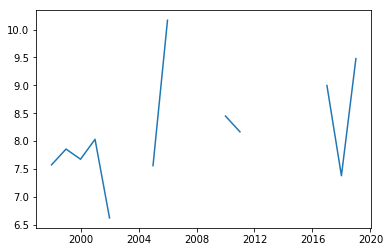

1997-12-31     7.572732
1998-12-31     7.855760
1999-12-31     7.673223
2000-12-31     8.031060
2001-12-31     6.620073
2004-12-31     7.558343
2005-12-31    10.167773
2007-12-31     9.057578
2009-12-31     8.448200
2010-12-31     8.165269
2012-12-31     9.832707
2014-12-31     9.784141
2016-12-31     8.996528
2017-12-31     7.377759
2018-12-31     9.479094
Name: 60954, dtype: float64

In [58]:
#logs is for normalization
lnprice=np.log(diff2)
lnprice
plt.plot(lnprice)
plt.show()
lnprice.dropna()

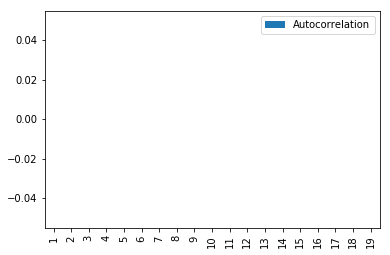

In [59]:
#checking for stationary
acf_1 = acf(lnprice)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

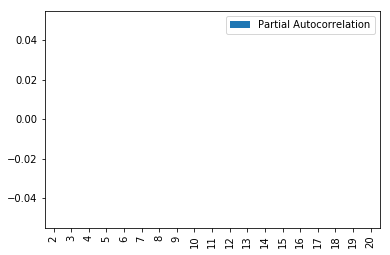

In [60]:
pacf_1 = pacf(lnprice)[1:20]
test_df.columns = ["Partial Autocorrelation"]
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

In [62]:
result = ts.adfuller(lnprice,1)
result
lnprice_diff = lnprice - lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
test_df.dropna()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

MissingDataError: exog contains inf or nans

In [ ]:
# Note is slowly decate is NOT stationary so we can use for an ARIMA
from statsmodels.graphics.tsaplots import plot_acf
# plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(df_5[0], alpha=.05)


# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.